# Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Import Data

In [2]:
videoGame=pd.read_csv('vgsales.csv', index_col=0)

# Explore Dataset

In [3]:
videoGame.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
videoGame.shape

(16598, 10)

In [5]:
videoGame.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
videoGame[['Global_Sales']].describe()

,Global_Sales
count,16598.000000
mean,0.537441
std,1.555028
min,0.010000
25%,0.060000
50%,0.170000
75%,0.470000
max,82.740000


In [7]:
videoGame.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


# Dataset Cleaning

In [8]:
videoGame.rename(columns= {'NA_Sales': 'NorthAmerica_Sales'}, inplace=True)
videoGame.rename(columns={'EU_Sales': 'Europe_Sales'}, inplace=True)
videoGame.rename(columns={'JP_Sales': 'Japan_Sales'}, inplace=True)
videoGame

,Name,Platform,Year,Genre,Publisher,NorthAmerica_Sales,Europe_Sales,Japan_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [9]:
videoGame.duplicated()

Rank
1        False
2        False
3        False
4        False
5        False
         ...  
16596    False
16597    False
16598    False
16599    False
16600    False
Length: 16598, dtype: bool

In [10]:
videoGame.dropna(axis=0, how='any', inplace=True)

In [11]:
videoGame.isnull().sum()

Name                  0
Platform              0
Year                  0
Genre                 0
Publisher             0
NorthAmerica_Sales    0
Europe_Sales          0
Japan_Sales           0
Other_Sales           0
Global_Sales          0
dtype: int64

In [12]:
videoGame[['Year']]=videoGame[['Year']].astype(int, copy=True, errors='raise' )

In [13]:
videoGame.dtypes

Name                   object
Platform               object
Year                    int64
Genre                  object
Publisher              object
NorthAmerica_Sales    float64
Europe_Sales          float64
Japan_Sales           float64
Other_Sales           float64
Global_Sales          float64
dtype: object

# How many games each genre has?

In [14]:
genres=videoGame['Genre'].unique()

In [15]:
genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
Genre=videoGame.groupby('Genre')[['Name']].count()
Genre.sort_values(by='Name')

,Name
Genre,
Puzzle,570
Strategy,670
Fighting,836
Simulation,848
Platform,875
Racing,1225
Adventure,1274
Shooter,1282
Role-Playing,1470


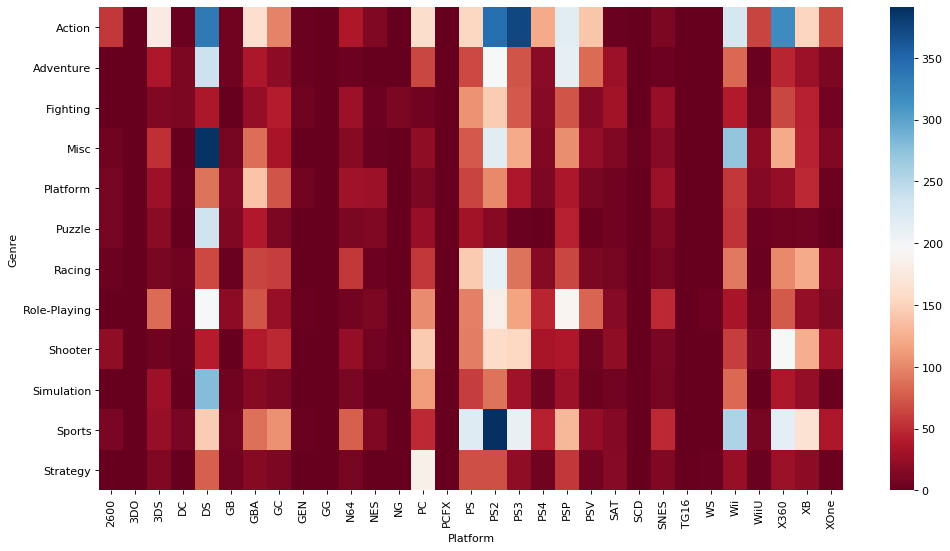

In [17]:
# Heatmap for how value of genre changes depending on value of platform
VG=videoGame.groupby('Genre').Platform.value_counts().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(15,8), dpi= 80) 
sns.heatmap(VG, cmap="RdBu")

# How many games released after 2000?

In [18]:
newGames=videoGame[videoGame['Year']>= 2000].count()
newGames['Name']

14317

In [19]:
#Portion of released games after 2000
pct_newGames=((newGames['Name'])/(videoGame[['Name']].count()))*100
pct_newGames

Name    87.88288
dtype: float64

Text(0, 0.5, 'Number of Games')

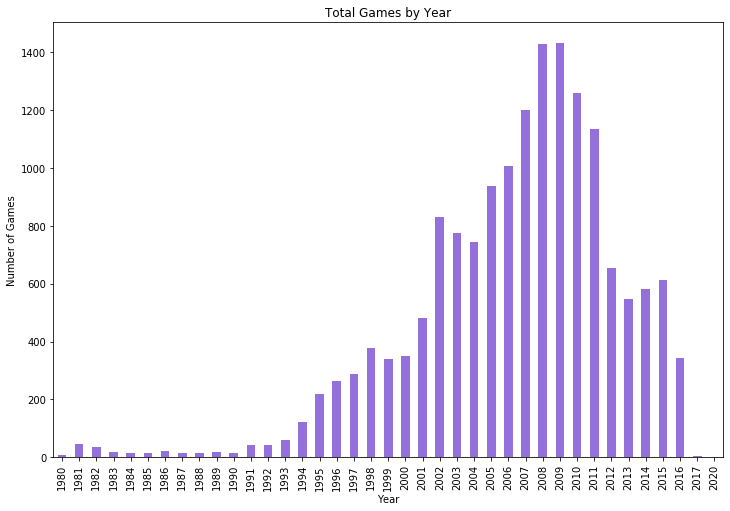

In [142]:
# Number of games for each year
rcParams['figure.figsize']=12,8
GYears_=videoGame.groupby('Year')[['Name']].count()
GYears_.plot(kind='bar',legend=False, color='mediumpurple')
plt.title('Total Games by Year')
plt.ylabel('Number of Games')

# How much sales each platform has according to global sales?

In [20]:
GSales_platform=videoGame.groupby('Platform')[['Global_Sales']].sum()
GSales_platform.sort_values(by='Global_Sales', ascending=False)

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91
PS,727.39
GBA,305.62
PSP,291.71
PS4,278.10


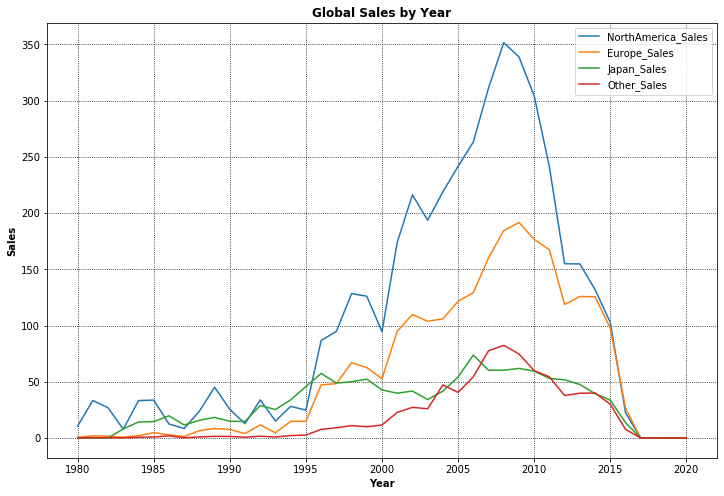

In [114]:
### Global sales for all three contries

sales = videoGame.groupby("Year")[["NorthAmerica_Sales","Europe_Sales","Japan_Sales","Other_Sales","Global_Sales"]].sum().reset_index()

rcParams['figure.figsize']=12,8
G_sales = sales.drop(["Year","Global_Sales"], axis=1).columns

for x in list(G_sales):
    sns.lineplot(data=sales, x=sales["Year"], y=sales[x], label=x)


plt.title("Global Sales by Year" , weight='bold')
plt.xlabel("Year", weight='bold')
plt.ylabel("Sales", weight='bold')
plt.grid(True, color='k',linestyle=":")

# What are the top 3 games of each sales?

In [23]:
# Top 3 of North America 
topNA=videoGame.groupby('Platform')[['NorthAmerica_Sales']].sum().sort_values(by='NorthAmerica_Sales', ascending=False)
topNA.head(3)

,NorthAmerica_Sales
Platform,
X360,594.33
PS2,572.92
Wii,497.37


Text(0, 0.5, 'NorthAmerica Sales')

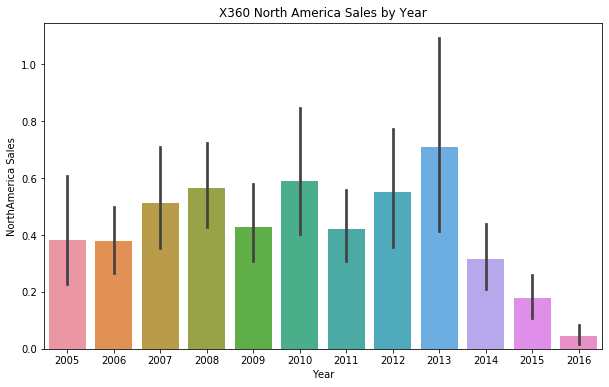

In [163]:
# America's trend platform sales by year
x360=videoGame[videoGame['Platform']=='X360']
plt.figure(figsize=(10,6))
plt.title("X360 North America Sales by Year")

sns.barplot(data=x360, x=x360['Year'], y=x360['NorthAmerica_Sales'])
plt.ylabel("NorthAmerica Sales")

In [24]:
# Top 3 of Europe
topEU=videoGame.groupby('Platform')[['Europe_Sales']].sum().sort_values(by='Europe_Sales', ascending=False)
topEU.head(3)

,Europe_Sales
Platform,
PS3,340.47
PS2,332.63
X360,278.00


In [25]:
# Top 3 of Japan
topJPN=videoGame.groupby('Platform')[['Japan_Sales']].sum().sort_values(by='Japan_Sales', ascending=False)
topJPN.head(3)

,Japan_Sales
Platform,
DS,175.02
PS,139.78
PS2,137.54


In [164]:
# Top 3 of Global sales
topGS=videoGame.groupby('Platform')[['Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False)
topGS.head(3)

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35


# The most Popular 5 Video Games according to Global Sales

Text(0, 0.5, 'Sales in millions')

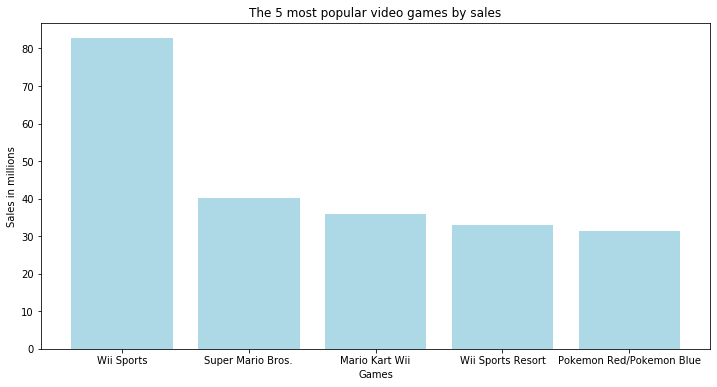

In [138]:
name = videoGame['Name'][:5]
global_s = videoGame['Global_Sales'][:5]

plt.figure(figsize=[12,6])
plt.bar(name, global_s, color='lightblue')

plt.title('The 5 most popular video games by sales')
plt.xlabel('Games')
plt.ylabel('Sales in millions')

# The most popular 20 publishers

Text(0, 0.5, 'Publishers')

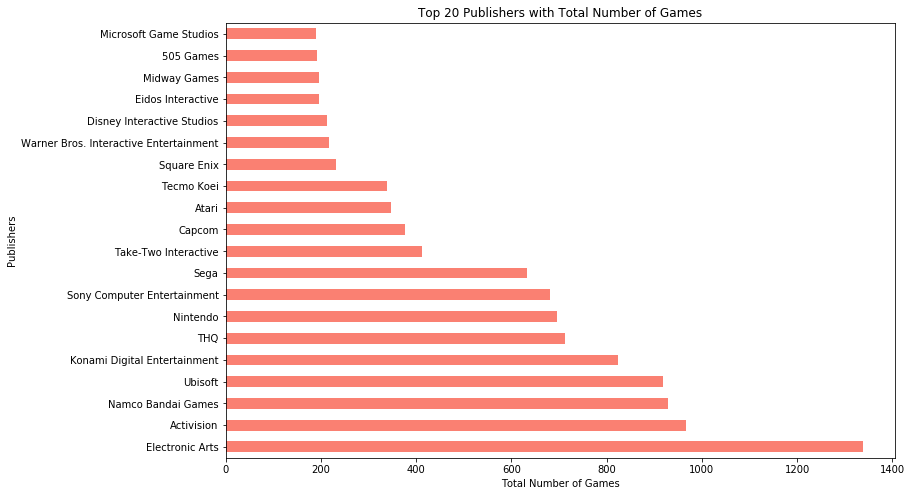

In [139]:
videoGame['Publisher'].value_counts()[:20].plot(kind='barh', color='Salmon')
plt.title('Top 20 Publishers with Total Number of Games')
plt.xlabel('Total Number of Games')
plt.ylabel('Publishers')

# What is the frequency of platforms by year?

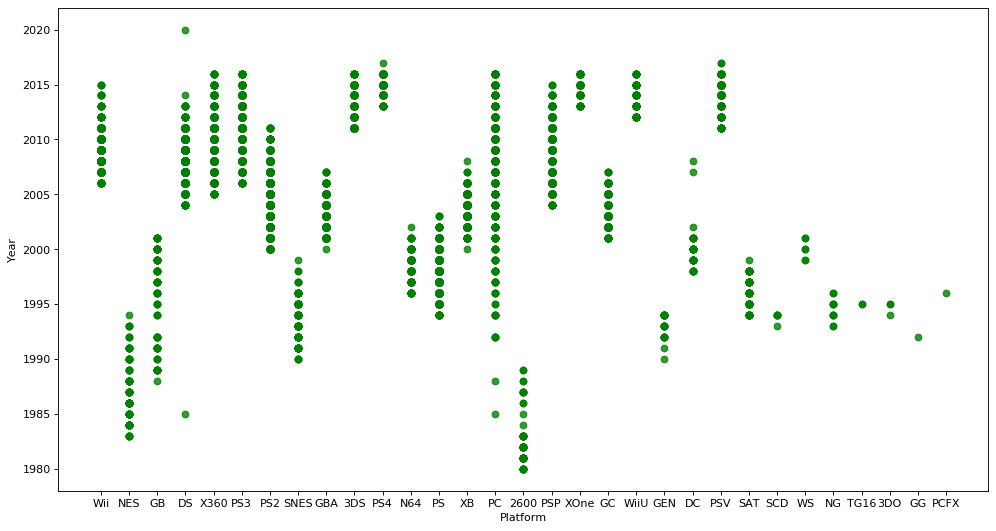

In [152]:
fig, ax = plt.subplots(figsize=(15,8), dpi= 80)    
sns.regplot(x='Platform', y='Year',data=videoGame, fit_reg=False, color='Green')